In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load data

In [13]:
df = pd.read_csv(f'/Volumes/GoogleDrive/My Drive/wish_local/local_pick_up_time_analysis/Data/dall_all_countries_variation_level.csv', \
                low_memory=False, \
                infer_datetime_format=True)
df.head(2)

,transaction_id,variation_id,picked_up_time,payment_received_time,transaction_time,shipping_country,user_id,store_id,store_country,zipcode,state,city,operation_hours,time
0,5dba901a3a1c9d696787143e,5c359fa9d445504b02bc8670,1572513305,1572507676,1572507674,HU,5a94705e646a3da42f0b12c3,5d5c17cf283abc55184b3ba5,HU,3525,NaN,Miskolc,09:00-17:00|09:00-17:00|09:00-17:00|09:00-17:0...,1612210614
1,5dd09e4cb627552b7f369688,5d9b7f6852e0245430b2d352,1574088056,1573953101,1573953100,CA,5c3c628e066c12751208d0c6,5d4dda3c1d9a8e44c067c910,CA,L6R 0B3,ON,Brampton,12:00-20:00|13:00-20:00|12:00-20:00|12:00-20:0...,1612210614


In [14]:
df.shape

(3334534, 14)

In [67]:
df.isna().sum()

transaction_id                            0
variation_id                              0
picked_up_time                            0
payment_received_time                     0
transaction_time                          0
shipping_country                          0
user_id                                   0
store_id                                  0
store_country                             0
zipcode                                   0
state                                198861
city                                      0
operation_hours                           0
time                                      0
pay_to_pick_seconds                       0
trans_to_pick_seconds                     0
operaion_hours_per_week                   0
total_operaion_hours_per_week             0
picked_up_date_local                      0
transaction_date_local                    0
pay_date_local                            0
trans_to_pick_local_days                  0
pay_to_pick_local_days          

# Clean data

## Pending issue: shipping country vs store country

In [15]:
df[df['shipping_country']!=df['store_country']]

,transaction_id,variation_id,picked_up_time,payment_received_time,transaction_time,shipping_country,user_id,store_id,store_country,zipcode,state,city,operation_hours,time
25510,5dc8f72543d6caaaca296126,5c17e1bc056c5e0e08d3cbe7,1573484724,1573451564,1573451557,FR,572c2eeda7ec3982f14269d9,5ce3bc0ab9f1104bb89fee4b,DE,77652,Baden Württemberg,Offenburg,13:00-18:00|13:00-18:00|13:00-18:00|13:00-18:0...,1612210614
27171,5fa14e8c6a484508dab5898a,5c4a03a8e1fb9026a936cb84,1604670655,1604406929,1604406924,FR,5dc50b614433da477a614109,5defaa1afcf2010c00e61eb9,DE,66740,Saarland,Saarlouis,10:00-20:00|10:00-20:00|10:00-20:00|10:00-20:0...,1612210614
36205,5dfbce6c6f3b1dd8464913aa,5c359f5f211ca166dc5af0cb,1577102364,1576783470,1576783468,BE,5c897ab34c882d22178f24b3,5d666de84adcfd635b5d03bc,PT,6230-348,Castelo Branco,fundao,09:00-18:00|09:00-18:00|09:00-18:00|09:00-18:0...,1612210614
51842,5da88e8475c1c9182ee0667c,5c256db9fe233e732bd34dc3,1571340738,1571327624,1571327620,FR,5c4c8bbca4ab9b21c5d8adb6,5d0a2642d2374211f46026a0,CH,1202,GE,Geneva,11:00-23:00|11:00-23:00|11:00-23:00|11:00-23:0...,1612210614
57078,5da6d93ac8634952b7f5e18e,5c359f613216a07e588f7e11,1571256383,1571215679,1571215674,US,595c72551558140cd6ffb408,5d5efd071377315cf1870db3,MX,32280,Chihuahua,Juárez,10:00-17:00|10:00-17:00|10:00-17:00|10:00-17:0...,1612210614
78038,5d206176ea77d96adc07d3c5,5c4a035ae55c672baae2abc9,1562863518,1562403194,1562403190,CH,5cf953a85419db44cac0e93b,5cd58f6d8da3ad6b82d42b3d,IT,21016,Varese,Luino,07:00-20:00|07:00-20:00|07:00-20:00|07:00-20:0...,1612210614
80230,5cfe65377a04cc0f89692d93,5c1988619935472226171564,1561726118,1560175928,1560175927,DE,5818ebcb192f45ac0b64df1c,5cd9be999764e16c390e0bbd,NL,6441 BE,Limburg,Brunssum,Closed|Closed|12:00-14:00|Closed|12:00-14:00|C...,1612210614
80910,5d08bbfcad399070faaf0e95,5c19885f993547222617155e,1560870224,1560853609,1560853500,DE,5c913d422eb6568f9b91f3fb,5cd9be999764e16c390e0bbd,NL,6441 BE,Limburg,Brunssum,Closed|Closed|12:00-14:00|Closed|12:00-14:00|C...,1612210614
90783,5d5efde0c5d02b31af12c872,5c17e1b697b7682234512e65,1566688287,1566506469,1566506464,MX,5ade806e0c23f923f0f19e90,5d41e5dc72b0c9685bf7c41a,US,79905,Texas,El Paso,10:00-18:00|10:00-18:00|10:00-18:00|10:00-18:0...,1612210614
92054,5d8e557a6eb21e5dc3cac057,5c46307004a84129b5acdea1,1570750986,1569609087,1569609082,MX,5a24def5422ed81693fe471a,5d41e5dc72b0c9685bf7c41a,US,79905,Texas,El Paso,10:00-18:00|10:00-18:00|10:00-18:00|10:00-18:0...,1612210614


## pay_to_pick_time and  trans_to_pick_time

In [16]:
df['pay_to_pick_seconds'] = df['picked_up_time'] - df['payment_received_time']
df['trans_to_pick_seconds'] = df['picked_up_time'] - df['transaction_time'] 


In [17]:
df[['pay_to_pick_seconds', 'trans_to_pick_seconds']].describe()

,pay_to_pick_seconds,trans_to_pick_seconds
count,3.334534e+06,3.334534e+06
mean,3.017696e+05,3.093123e+05
std,5.137350e+05,5.155249e+05
min,-7.497990e+05,9.000000e+00
25%,2.684800e+04,3.390400e+04
50%,1.363515e+05,1.458160e+05
75%,3.932405e+05,4.055610e+05
max,3.384116e+07,3.384116e+07


## operation hours per week

In [18]:
from datetime import datetime
def operation_hours_per_day(d):
    if d == 'Closed':
        return 0 
    
    periods = d.split(',')
    hours = 0
    for p in periods:
        start, end = p.split('-')[0], p.split('-')[1]
        if (start == end) and (start=='00:00'): # open 24 hours
            hours += 24
        else:
            h = (datetime.strptime(end, "%H:%M") - datetime.strptime(start, "%H:%M")).seconds / 3600
            hours += h
            
    return hours
    

def operation_hours_per_week(x):
    days = x.split('|')
    hours = []
    for d in days:
        hours.append(operation_hours_per_day(d))
                
    return hours
    
    
df['operaion_hours_per_week'] = df['operation_hours'].apply(operation_hours_per_week)
df['total_operaion_hours_per_week'] = df['operaion_hours_per_week'].apply(sum)

<AxesSubplot:>

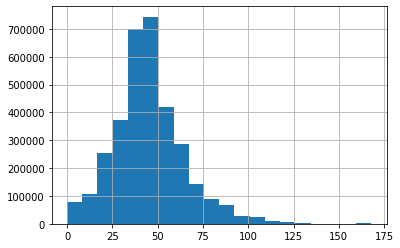

In [19]:
df['total_operaion_hours_per_week'].hist(bins=20)

## pay_date, trans_date, pick_up_date, pick_up_calendar_days

In [21]:
from datetime import datetime, timezone
import pytz
country_timezone = {'US': 'America/Los_Angeles',\
                    'MX': 'America/Mexico_City',\
                    'IT': 'Europe/Rome',\
                    'FR': 'Europe/Paris',\
                    'ES': 'Europe/Madrid'}

def unix_time_to_local_date(date, country):
    if country in country_timezone:
        local_timezone = country_timezone[country]
        return datetime.fromtimestamp(date, pytz.timezone(local_timezone)).date()#.strftime("%Y-%m")
    else:
        return datetime.fromtimestamp(date, pytz.timezone('UTC')).date()#.strftime("%Y-%m")


In [23]:
df['picked_up_date_local'] = df.apply(\
        lambda x: unix_time_to_local_date(date=x['picked_up_time'], country=x['store_country']), axis=1)
df['transaction_date_local'] = df.apply(\
        lambda x: unix_time_to_local_date(date=x['transaction_time'], country=x['store_country']), axis=1)
df['pay_date_local'] = df.apply(\
        lambda x: unix_time_to_local_date(date=x['payment_received_time'], country=x['store_country']), axis=1)


df['trans_to_pick_local_days'] = (df['picked_up_date_local'] -\
                                        df['transaction_date_local']).apply(lambda x: x.days)
df['pay_to_pick_local_days'] = (df['picked_up_date_local'] -\
                                        df['pay_date_local']).apply(lambda x: x.days)


## Apply final filters

### Exclude negative pay_to_pick_time

In [25]:
df = df[df['pay_to_pick_seconds'] >= 0]

### Exclude some countries

In [26]:
fusion_countries = set(country_timezone.keys())
df = df[df['store_country'].apply(lambda x: x in fusion_countries)]

# Exclude offline cash

# operation hours and pick up time

<AxesSubplot:xlabel='total_operaion_hours_per_week_q20,None'>

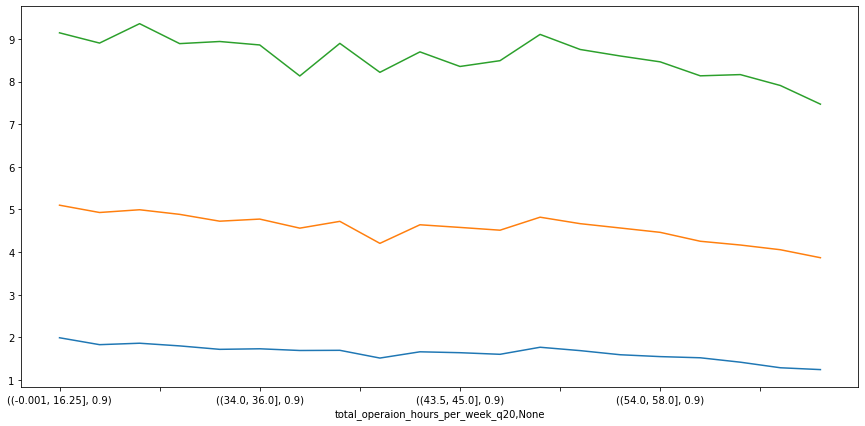

In [27]:
df['total_operaion_hours_per_week_q20'] = pd.qcut(df['total_operaion_hours_per_week'], 20)
temp = df.groupby('total_operaion_hours_per_week_q20')['trans_to_pick_seconds']
(temp.quantile([0.5])/3600/24).plot(figsize=(15,7))
(temp.quantile([0.75])/3600/24).plot()
(temp.quantile([0.9])/3600/24).plot()

Text(0.5, 1.0, 'Local store operation time and pick up time')

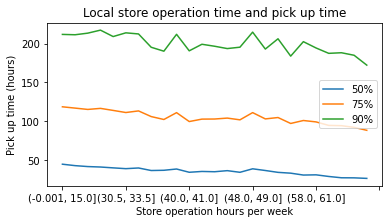

In [78]:
df['total_operaion_hours_per_week_q25'] = pd.qcut(df['total_operaion_hours_per_week'], 25)
temp = (df.groupby('total_operaion_hours_per_week_q25')['pay_to_pick_seconds'].quantile(\
                                        [0.5, .75, .9])/3600).unstack()
# temp = (df.groupby('total_operaion_hours_per_week_q20')['pay_to_pick_local_days'].quantile(\

temp.columns = ['50%', '75%', '90%']
temp.plot(figsize=(6, 3))
plt.legend()
plt.xlabel('Store operation hours per week')
plt.ylabel('Pick up time (hours)')
plt.title('Local store operation time and pick up time')

In [79]:
temp

,50%,75%,90%
total_operaion_hours_per_week_q25,,,
"(-0.001, 15.0]",44.855000,118.642778,211.707722
"(15.0, 20.0]",43.003333,116.965347,211.260778
"(20.0, 25.0]",41.813750,115.261667,213.322528
"(25.0, 29.0]",41.231944,116.616944,217.202167
"(29.0, 30.5]",40.140694,113.996111,208.950333
"(30.5, 33.5]",39.120833,111.286389,213.723611
"(33.5, 35.0]",39.996944,113.355417,212.303444
"(35.0, 36.0]",36.734583,106.080278,195.188611
"(36.0, 38.5]",37.036944,102.332778,190.127222


# Pick up time analysis

## Hours

In [28]:
df.loc[:,'picked_up_yearmonth'] = df['picked_up_date_local'].apply(\
                                                                lambda x: x.strftime("%Y-%m"))
df.loc[:,'transaction_yearmonth'] = df['transaction_date_local'].apply(\
                                                                lambda x: x.strftime("%Y-%m"))
df.loc[:,'pay_yearmonth'] = df['pay_date_local'].apply(\
                                                                lambda x: x.strftime("%Y-%m"))

In [31]:
# df.loc[:,'trans_to_pick_days'] = df['trans_to_pick_seconds'] / (60 * 60 * 24)
df.groupby(['store_country', 'pay_yearmonth'])['pay_to_pick_local_days'].describe(\
                                        percentiles=[.5,.75,.85,.90,.95,.99]).round(1)#.astype(int)

count  mean   std  min   50%   75%   85%   90%  \
store_country pay_yearmonth                                                     
ES            2019-05          377.0   5.5   8.8  0.0   2.0   7.0  11.0  15.0   
              2019-06         1196.0   6.0   7.7  0.0   3.0   8.0  14.0  18.5   
              2019-07         2311.0   5.1   7.7  0.0   2.0   7.0  12.0  16.0   
              2019-08         5736.0   5.0   6.9  0.0   2.0   7.0  12.0  16.0   
              2019-09        12057.0   3.8   5.8  0.0   1.0   5.0   8.0  11.0   
              2019-10        17754.0   3.2   4.0  0.0   1.0   5.0   8.0  10.0   
              2019-11        20384.0   3.4   4.0  0.0   2.0   5.0   8.0  10.0   
              2019-12        21145.0   3.3   4.1  0.0   2.0   5.0   8.0  10.0   
              2020-01        28184.0   3.1   4.4  0.0   1.0   4.0   7.0  10.0   
              2020-02        26780.0   2.9   4.5  0.0   1.0   4.0   7.0   9.0   
              2020-03        10693.0   4.1   9.4  0.0   1.0   3.0   6.0   8.0   
              2020-04         3600.0  15.4  17.4  0.0   8.0  26.0  38.0  43.0   
              2020-05         9551.0   6.4   9.9  0.0   2.0   8.0  13.0  19.0   
              2020-06         7833.0   3.4   5.7  0.0   2.0   4.0   6.0   7.0   
              2020-07         5521.0   2.7   4.0  0.0   2.0   4.0   5.0   6.0   
              2020-08         3653.0   3.1   4.4  0.0   2.0   4.0   6.0   7.0   
              2020-09         5768.0   2.5   2.9  0.0   2.0   4.0   5.0   6.0   
              2020-10         6552.0   2.3   2.3  0.0   2.0   4.0   5.0   6.0   
              2020-11        12176.0   2.2   2.2  0.0   2.0   4.0   5.0   6.0   
              2020-12        19245.0   2.2   2.2  0.0   1.0   4.0   5.0   6.0   
              2021-01         1153.0   2.6   2.1  0.0   2.0   4.0   5.0   5.8   
FR            2019-01            2.0  10.5   2.1  9.0  10.5  11.2  11.5  11.7   
              2019-02          196.0   6.0  10.5  0.0   2.0   6.0  10.8  16.0   
              2019-03          263.0   8.2  12.7  0.0   3.0  10.5  16.0  20.0   
              2019-04          552.0   6.8   9.4  0.0   3.0   9.0  15.0  19.9   
              2019-05         1995.0   5.1   7.3  0.0   2.0   7.0  11.0  15.0   
              2019-06         3423.0   5.7   7.5  0.0   2.0   8.0  13.0  17.0   
              2019-07         3157.0   6.0   7.7  0.0   2.0   9.0  14.0  19.0   
              2019-08         5417.0   5.8   7.6  0.0   2.0   9.0  14.0  18.0   
              2019-09         8367.0   4.4   6.1  0.0   2.0   6.0  10.0  13.0   
              2019-10        12187.0   3.4   4.1  0.0   1.0   5.0   8.0  10.0   
              2019-11        15865.0   4.0   4.3  0.0   2.0   6.0   9.0  11.0   
              2019-12        14882.0   3.6   4.9  0.0   2.0   6.0   8.0  11.0   
              2020-01        14453.0   3.8   6.3  0.0   2.0   6.0   8.0  11.0   
              2020-02        13387.0   3.4   4.9  0.0   2.0   5.0   8.0  10.0   
              2020-03         5788.0   6.7  14.3  0.0   1.0   4.0   8.0  18.0   
              2020-04         2059.0  15.8  17.5  0.0   7.0  29.0  39.0  44.0   
              2020-05         5761.0   7.2  11.4  0.0   2.0   9.0  15.0  23.0   
              2020-06         6094.0   4.4   8.4  0.0   2.0   5.0   7.0   9.0   
              2020-07         4642.0   2.9   4.5  0.0   2.0   4.0   6.0   6.0   
              2020-08         5632.0   2.3   3.2  0.0   1.0   4.0   5.0   6.0   
              2020-09         7489.0   2.2   2.9  0.0   1.0   3.0   5.0   6.0   
              2020-10         7945.0   2.3   3.5  0.0   1.0   3.0   5.0   6.0   
              2020-11        10230.0   6.1   9.1  0.0   2.0   7.0  13.0  19.0   
              2020-12        11409.0   3.1   5.1  0.0   1.0   4.0   6.0   7.0   
              2021-01          647.0   3.3   2.1  0.0   3.0   5.0   6.0   6.0   
IT            2019-03          458.0   2.5   6.5  0.0   1.0   2.0   4.0   6.0   
              2019-04         2011.0   3.4   7.7  0.0   1.0   

## Calendar days

In [39]:
df.groupby(['store_country', 'pay_yearmonth'])[\
        'pay_to_pick_local_days'].describe(percentiles=[.5,.75,.85,.90,.95,.99]\
                                                    )#.to_csv('Data/country_pick_up_calendar_days.csv')

count       mean        std  min   50%    75%  \
store_country pay_yearmonth                                                    
ES            2019-05          377.0   5.538462   8.774008  0.0   2.0   7.00   
              2019-06         1196.0   5.977425   7.700806  0.0   3.0   8.00   
              2019-07         2311.0   5.118563   7.687836  0.0   2.0   7.00   
              2019-08         5736.0   5.048989   6.932144  0.0   2.0   7.00   
              2019-09        12057.0   3.768267   5.799190  0.0   1.0   5.00   
              2019-10        17754.0   3.207784   4.033659  0.0   1.0   5.00   
              2019-11        20384.0   3.391140   4.031255  0.0   2.0   5.00   
              2019-12        21145.0   3.304895   4.129555  0.0   2.0   5.00   
              2020-01        28184.0   3.053506   4.367618  0.0   1.0   4.00   
              2020-02        26780.0   2.938051   4.454190  0.0   1.0   4.00   
              2020-03        10693.0   4.080801   9.428131  0.0   1.0   3.00   
              2020-04         3600.0  15.430000  17.364266  0.0   8.0  26.00   
              2020-05         9551.0   6.397969   9.862735  0.0   2.0   8.00   
              2020-06         7833.0   3.432784   5.723664  0.0   2.0   4.00   
              2020-07         5521.0   2.665459   4.017604  0.0   2.0   4.00   
              2020-08         3653.0   3.076376   4.363535  0.0   2.0   4.00   
              2020-09         5768.0   2.509535   2.869253  0.0   2.0   4.00   
              2020-10         6552.0   2.283730   2.279894  0.0   2.0   4.00   
              2020-11        12176.0   2.240309   2.153358  0.0   2.0   4.00   
              2020-12        19245.0   2.187581   2.232147  0.0   1.0   4.00   
              2021-01         1153.0   2.559410   2.074184  0.0   2.0   4.00   
FR            2019-01            2.0  10.500000   2.121320  9.0  10.5  11.25   
              2019-02          196.0   5.959184  10.480182  0.0   2.0   6.00   
              2019-03          263.0   8.178707  12.745992  0.0   3.0  10.50   
              2019-04          552.0   6.833333   9.428946  0.0   3.0   9.00   
              2019-05         1995.0   5.070677   7.300920  0.0   2.0   7.00   
              2019-06         3423.0   5.692959   7.513446  0.0   2.0   8.00   
              2019-07         3157.0   5.955337   7.721768  0.0   2.0   9.00   
              2019-08         5417.0   5.766661   7.630222  0.0   2.0   9.00   
              2019-09         8367.0   4.414844   6.113801  0.0   2.0   6.00   
              2019-10        12187.0   3.371133   4.098796  0.0   1.0   5.00   
              2019-11        15865.0   3.993571   4.266032  0.0   2.0   6.00   
              2019-12        14882.0   3.589638   4.863163  0.0   2.0   6.00   
              2020-01        14453.0   3.750640   6.345381  0.0   2.0   6.00   
              2020-02        13387.0   3.374767   4.868822  0.0   2.0   5.00   
              2020-03         5788.0   6.683656  14.331373  0.0   1.0   4.00   
              2020-04         2059.0  15.800389  17.486229  0.0   7.0  29.00   
              2020-05         5761.0   7.208991  11.421109  0.0   2.0   9.00   
              2020-06         6094.0   4.436495   8.399735  0.0   2.0   5.00   
              2020-07         4642.0   2.902844   4.493218  0.0   2.0   4.00   
              2020-08         5632.0   2.321911   3.194666  0.0   1.0   4.00   
              2020-09         7489.0   2.172520   2.930578  0.0   1.0   3.00   
              2020-10         7945.0   2.281435   3.549760  0.0   1.0   3.00   
              2020-11        10230.0   6.064907   9.090775  0.0   2.0   7.00   
              2020-12        11409.0   3.064861   5.141596  0.0   1.0   4.00   
              2021-01          647.0   3.306028   2.143247  0.0   3.0   5.00   
IT            2019-03          458.0   2.521834   6.514129  0.0   1.0   2.00   
              2019-04         2011.0   3.380408   7.677906  0.0   1.0   3.00   
              2019-05         6

## Calendar days w/ operation days considered

In [71]:
def open_days_from_day1_to_picked_date(row):
    '''
    return total number of open days from pay_date(exclusive) and picked_up_date(inclusive) 
    
    '''
    days_between = row['pay_to_pick_local_days']
    
    if days_between == 0: # picked up on the same day
        return 0 
    
    day1 = (row['pay_date_local'].weekday() + 1) % 7 # weekday after transaction date
    op_hours = row['operation_hours'].split('|') 
    
    # ex: [False, False, True, True, True, True, False]. open or not, from Monday to Sunday
    op_hours_boolen = [False if d == 'Closed' else True for d in op_hours] 
    
    # number of entire weeks, floor division * number of open days in one week
    whole_weeks = (days_between // 7) * sum(op_hours_boolen)
    
    # number of open days in the remain days
    op_hours_boolen_two_weeks = op_hours_boolen + op_hours_boolen
    remainder_days = sum(op_hours_boolen_two_weeks[day1 : day1+(days_between%7)])
    
    # return total number of open days
    return whole_weeks + remainder_days
    
df['pay_to_pick_local_days_open'] = df.apply(\
                                                    open_days_from_day1_to_picked_date, axis=1)

In [72]:
df.groupby(['store_country', 'pay_yearmonth'])['pay_to_pick_local_days_open'].describe(\
                    percentiles=[.5,.75,.85,.90,.95,.99]).to_csv('Data/country_pick_up_open_days.csv')

In [86]:
df.head()

,transaction_id,variation_id,picked_up_time,payment_received_time,transaction_time,shipping_country,user_id,store_id,store_country,zipcode,state,city,operation_hours,time,pay_to_pick_seconds,trans_to_pick_seconds,operaion_hours_per_week,total_operaion_hours_per_week,picked_up_date_local,transaction_date_local,pay_date_local,trans_to_pick_local_days,pay_to_pick_local_days,trans_to_pick_days,picked_up_yearmonth,transaction_yearmonth,total_operaion_hours_per_week_q20,trans_to_pick_local_days_open
2,5e5b79acbc949708839014b8,5c4a036288717a269679be73,1583513427,1583053230,1583053228,ES,5b564525cd893e47a836d285,5d710f2325da6b5873a53c76,ES,08031,BARCELONA,BARCELONA,10:00-13:00|10:00-13:00|10:00-13:00|10:00-13:0...,1612210614,460197,460199,"[3.0, 3.0, 3.0, 3.0, 3.0, 0, 0]",15.0,2020-03-06,2020-03-01,2020-03-01,5,5,5.326377,2020-03,2020-03,"(-0.001, 16.25]",5
3,5ebe08abac178e762bffaa8b,5c256c2f93a8ff35aae339e5,1589638166,1589512368,1589512363,FR,5ebe0337619812c42589bf7b,5c2d81e86fa88c9e2cfa8cdb,FR,75020,NaN,Paris,10:00-19:00|10:00-19:00|10:00-19:00|10:00-19:0...,1612210614,125798,125803,"[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 0]",54.0,2020-05-16,2020-05-15,2020-05-15,1,1,1.456053,2020-05,2020-05,"(52.0, 54.0]",1
4,5da5ca7891f7c46a72a80b69,5c240769a2d784229bb1ece1,1571304344,1571146363,1571146360,FR,5cc56acb3d8fca73ed7d1424,5cad0c58fd8e9a2ec1125a65,FR,88000,Vosges,Epinal,"09:00-12:00,14:00-20:00|09:00-12:00,13:30-20:0...",1612210614,157981,157984,"[9.0, 9.5, 9.5, 9.5, 8.0, 11.0, 6.5]",63.0,2019-10-17,2019-10-15,2019-10-15,2,2,1.828519,2019-10,2019-10,"(62.5, 69.0]",2
7,5ddafba3f9432da02b1aac1e,5c17e1b697b7682234512e65,1574634099,1574632360,1574632355,US,5d1717db0050e1128367ccee,5d7001b451da4f05fc989c46,US,89102,Nevada,Las Vegas,Closed|Closed|Closed|Closed|10:00-18:00|10:00-...,1612210614,1739,1744,"[0, 0, 0, 0, 8.0, 8.0, 8.0]",24.0,2019-11-24,2019-11-24,2019-11-24,0,0,0.020185,2019-11,2019-11,"(16.25, 24.0]",0
8,5dfd6de9a5027810794b00ee,5c344471b1ca0d7eddf795e8,1576890566,1576889835,1576889833,US,5d1717db0050e1128367ccee,5d7001b451da4f05fc989c46,US,89102,Nevada,Las Vegas,Closed|Closed|Closed|Closed|10:00-18:00|10:00-...,1612210614,731,733,"[0, 0, 0, 0, 8.0, 8.0, 8.0]",24.0,2019-12-20,2019-12-20,2019-12-20,0,0,0.008484,2019-12,2019-12,"(16.25, 24.0]",0


# Export cleaned data

In [77]:
df.to_csv('Data/data_all_countries_variation_level_cleaned.csv')

# Import cleaned data

In [9]:
dates = ['picked_up_date_local', 'transaction_date_local', 'pay_date_local']
df = pd.read_csv('Data/data_all_countries_variation_level_cleaned.csv', \
                 index_col=0, \
                 parse_dates=dates, infer_datetime_format=True)
df.loc[:,'pay_yearmonth'] = df['pay_date_local'].apply(\
                                                                lambda x: x.strftime("%Y-%m"))

/Users/mshi/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/usr/local/lib/python3.9/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [11]:
df.head()

,transaction_id,variation_id,picked_up_time,payment_received_time,transaction_time,shipping_country,user_id,store_id,store_country,zipcode,state,city,operation_hours,time,pay_to_pick_seconds,trans_to_pick_seconds,operaion_hours_per_week,total_operaion_hours_per_week,picked_up_date_local,transaction_date_local,pay_date_local,trans_to_pick_local_days,pay_to_pick_local_days,trans_to_pick_days,picked_up_yearmonth,transaction_yearmonth,total_operaion_hours_per_week_q20,trans_to_pick_local_days_open,pay_yearmonth
2,5e5b79acbc949708839014b8,5c4a036288717a269679be73,1583513427,1583053230,1583053228,ES,5b564525cd893e47a836d285,5d710f2325da6b5873a53c76,ES,08031,BARCELONA,BARCELONA,10:00-13:00|10:00-13:00|10:00-13:00|10:00-13:0...,1612210614,460197,460199,"[3.0, 3.0, 3.0, 3.0, 3.0, 0, 0]",15.0,2020-03-06,2020-03-01,2020-03-01,5,5,5.326377,2020-03,2020-03,"(-0.001, 16.25]",5,2020-03
3,5ebe08abac178e762bffaa8b,5c256c2f93a8ff35aae339e5,1589638166,1589512368,1589512363,FR,5ebe0337619812c42589bf7b,5c2d81e86fa88c9e2cfa8cdb,FR,75020,NaN,Paris,10:00-19:00|10:00-19:00|10:00-19:00|10:00-19:0...,1612210614,125798,125803,"[9.0, 9.0, 9.0, 9.0, 9.0, 9.0, 0]",54.0,2020-05-16,2020-05-15,2020-05-15,1,1,1.456053,2020-05,2020-05,"(52.0, 54.0]",1,2020-05
4,5da5ca7891f7c46a72a80b69,5c240769a2d784229bb1ece1,1571304344,1571146363,1571146360,FR,5cc56acb3d8fca73ed7d1424,5cad0c58fd8e9a2ec1125a65,FR,88000,Vosges,Epinal,"09:00-12:00,14:00-20:00|09:00-12:00,13:30-20:0...",1612210614,157981,157984,"[9.0, 9.5, 9.5, 9.5, 8.0, 11.0, 6.5]",63.0,2019-10-17,2019-10-15,2019-10-15,2,2,1.828519,2019-10,2019-10,"(62.5, 69.0]",2,2019-10
7,5ddafba3f9432da02b1aac1e,5c17e1b697b7682234512e65,1574634099,1574632360,1574632355,US,5d1717db0050e1128367ccee,5d7001b451da4f05fc989c46,US,89102,Nevada,Las Vegas,Closed|Closed|Closed|Closed|10:00-18:00|10:00-...,1612210614,1739,1744,"[0, 0, 0, 0, 8.0, 8.0, 8.0]",24.0,2019-11-24,2019-11-24,2019-11-24,0,0,0.020185,2019-11,2019-11,"(16.25, 24.0]",0,2019-11
8,5dfd6de9a5027810794b00ee,5c344471b1ca0d7eddf795e8,1576890566,1576889835,1576889833,US,5d1717db0050e1128367ccee,5d7001b451da4f05fc989c46,US,89102,Nevada,Las Vegas,Closed|Closed|Closed|Closed|10:00-18:00|10:00-...,1612210614,731,733,"[0, 0, 0, 0, 8.0, 8.0, 8.0]",24.0,2019-12-20,2019-12-20,2019-12-20,0,0,0.008484,2019-12,2019-12,"(16.25, 24.0]",0,2019-12
